# Demonstration 2: Cliff Walking

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sisyphus import ValueIteration
%matplotlib inline

## Value Iteration

### Betamax

In [ ]:
from sisyphus.envs import CliffWalking

## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4))

## Initialize environment.
gym = CliffWalking()

for ax, beta in zip(axes, [1,0.9,0.8]):
    
    ## Perform Q-value iteration.
    qvi = ValueIteration(policy='betamax', beta=beta)
    qvi = qvi.fit(gym)
    
    ## Plot state values.
    V = qvi.V.copy()
    V[gym.terminal] = np.nan
    sns.heatmap(V.reshape(gym.shape), vmin=-16, vmax=0, xticklabels=[], yticklabels=[], 
                cmap='Greys_r', cbar=False, ax=ax)
    
    ## Plot policy.
    y, x = np.where(np.isin(gym.grid, qvi.pi))
    ax.scatter(x + 0.5,y + 0.5, marker='s', color='purple')
    
plt.tight_layout()
plt.savefig('figures/02_cliff_betamax.png', dpi=180)

### Softmax

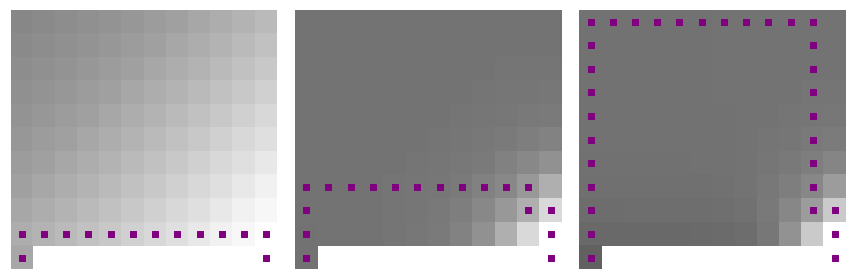

In [6]:
from sisyphus.envs import CliffWalking

## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4))

## Initialize environment.
gym = CliffWalking()

for ax, beta in zip(axes, [10, 1e-1, 5e-2]):
    
    ## Perform Q-value iteration.
    qvi = ValueIteration(policy='softmax', beta=beta)
    qvi = qvi.fit(gym)
    
    ## Plot state values.
    V = qvi.V.copy()
    V[gym.terminal] = np.nan
    sns.heatmap(V.reshape(gym.shape), vmin=-16, vmax=0, xticklabels=[], yticklabels=[], 
                cmap='Greys_r', cbar=False, ax=ax)
    
    ## Plot policy.
    y, x = np.where(np.isin(gym.grid, qvi.pi))
    ax.scatter(x + 0.5,y + 0.5, marker='s', color='purple')
    
plt.tight_layout()
plt.savefig('figures/02_cliff_softmax.png', dpi=180)